In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import re

In [45]:
path: str = './data/'
prokaryotes: pd.DataFrame = pd.read_csv(os.path.join(path, "prokaryotes_323columns.csv"))
droplist = [0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
prokaryotes = prokaryotes.drop(prokaryotes.columns[droplist], axis=1)
prokaryotes = prokaryotes.drop(['helixind','helixseq'],axis = 1)
prokaryotes = prokaryotes.reset_index(drop=True)

C:\Users\tobia\AppData\Local\Temp\ipykernel_34196\3969342450.py:2: DtypeWarning: Columns (8,21,22,23,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  prokaryotes: pd.DataFrame = pd.read_csv(os.path.join(path, "prokaryotes_323columns.csv"))


In [62]:
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import SparsePCA

In [54]:
prokaryotes = prokaryotes.fillna(0)

In [51]:
prokaryotes.replace([np.inf, -np.inf], np.nan, inplace=True)

In [55]:
scaled_prokaryotes = StandardScaler().fit_transform(prokaryotes)

In [56]:
PCA_prokaryotes = PCA().fit(scaled_prokaryotes)

In [58]:
eigenvalues = PCA_prokaryotes.explained_variance_ 
prokaryotes_PCA = PCA(n_components=np.sum(eigenvalues > 0.7)).fit_transform(scaled_prokaryotes)

In [59]:
prokaryotes_PCA_df = pd.DataFrame(data = prokaryotes_PCA, columns = [f'PC{i+1}' for i in range(np.sum(eigenvalues > 0.7))])

In [64]:
variance = PCA_prokaryotes.explained_variance_ratio_


In [79]:
prokaryotesmp =  pd.read_csv(os.path.join(path, "prokaryotes_323columns.csv"))

C:\Users\tobia\AppData\Local\Temp\ipykernel_34196\3362361442.py:1: DtypeWarning: Columns (8,21,22,23,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  prokaryotesmp =  pd.read_csv(os.path.join(path, "prokaryotes_323columns.csv"))


In [80]:
low_threshold = prokaryotesmp['meltPoint'].quantile(0.33)
high_threshold = prokaryotesmp['meltPoint'].quantile(0.67)
for n in prokaryotesmp.index:
    if prokaryotesmp.loc[n,'meltPoint'] <= low_threshold:
        prokaryotes_PCA_df.loc[n, 'meltPoint1'] = 'low_Tm'
    elif prokaryotesmp.loc[n,'meltPoint'] >= high_threshold:
        prokaryotes_PCA_df.loc[n, 'meltPoint1'] = 'high_Tm'
    else:
        prokaryotes_PCA_df.loc[n, 'meltPoint1'] = 'mid_Tm'

In [97]:
for n in prokaryotesmp.index:
    if prokaryotesmp.loc[n,'meltPoint'] <= prokaryotesmp['meltPoint'].quantile(0.05):
        prokaryotes_PCA_df.loc[n, 'meltPoint2'] = 'low_Tm'
    elif prokaryotesmp.loc[n,'meltPoint'] >= prokaryotesmp['meltPoint'].quantile(0.475) and prokaryotesmp.loc[n,'meltPoint'] <= prokaryotesmp['meltPoint'].quantile(0.525):
        prokaryotes_PCA_df.loc[n, 'meltPoint2'] = 'mid_Tm'
    elif prokaryotesmp.loc[n,'meltPoint'] >= prokaryotesmp['meltPoint'].quantile(0.95):
        prokaryotes_PCA_df.loc[n, 'meltPoint2'] = 'high_Tm'

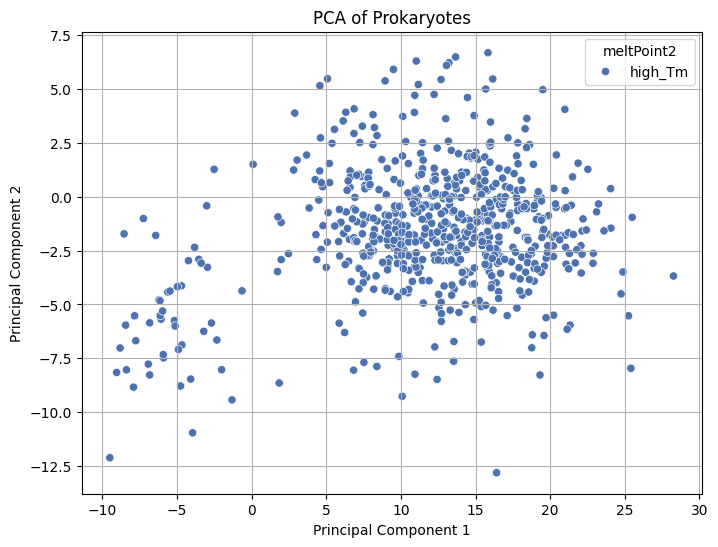

In [101]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data = prokaryotes_PCA_df[prokaryotes_PCA_df['meltPoint2'].isin(['high_Tm','mid_Tm','low_Tm'])], x = 'PC1', y = 'PC2', hue = 'meltPoint2',palette = 'deep')
#sns.scatterplot(data = prokaryotes_PCA_df, x = 'PC1', y = 'PC3', hue = 'meltPoint',palette = 'deep')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Prokaryotes')
plt.grid()
plt.show()

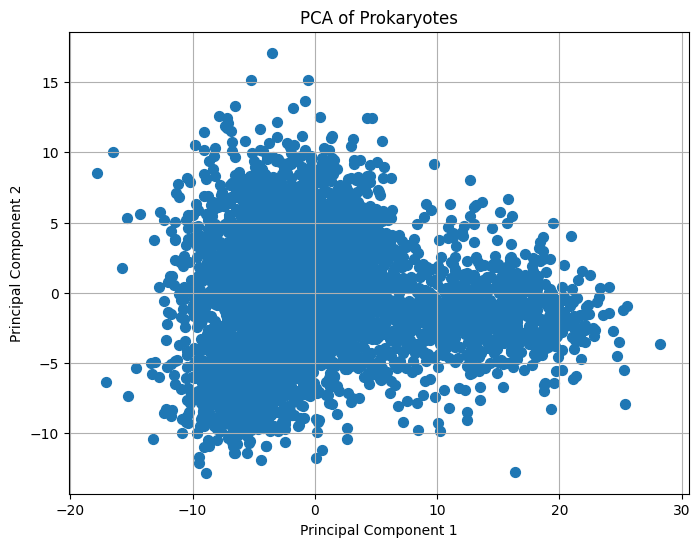

In [61]:
plt.figure(figsize=(8, 6))
plt.scatter(prokaryotes_PCA_df['PC1'], prokaryotes_PCA_df['PC2'], s = 50, )
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Prokaryotes')
plt.grid()
plt.show()

Sparse PCA

In [70]:
'''sPCA_prokaryotes = SparsePCA().fit(scaled_prokaryotes)
seigenvalues = sPCA_prokaryotes.explained_variance_ 
sprokaryotes_sPCA = SparsePCA(n_components=np.sum(seigenvalues > 0.7)).fit_transform(scaled_prokaryotes)
sprokaryotes_sPCA_df = pd.DataFrame(data = sprokaryotes_sPCA, columns = [f'PC{i+1}' for i in range(np.sum(seigenvalues > 0.7))])
svariance = sPCA_prokaryotes.explained_variance_ratio_'''

"sPCA_prokaryotes = SparsePCA().fit(scaled_prokaryotes)\nseigenvalues = sPCA_prokaryotes.explained_variance_ \nsprokaryotes_sPCA = SparsePCA(n_components=np.sum(seigenvalues > 0.7)).fit_transform(scaled_prokaryotes)\nsprokaryotes_sPCA_df = pd.DataFrame(data = sprokaryotes_sPCA, columns = [f'PC{i+1}' for i in range(np.sum(seigenvalues > 0.7))])\nsvariance = sPCA_prokaryotes.explained_variance_ratio_"